## <font color='BLUE'>1. Import and change working directory</font>


In [1]:
import pandas as pd

In [2]:
%cd ~

C:\Users\Hoa Duong


In [3]:
%cd Integrify\1. Assignment\GROUPWORK\online_news_popularity

C:\Users\Hoa Duong\Integrify\1. Assignment\GROUPWORK\online_news_popularity


In [4]:
import plotly.graph_objects as go
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

# option for pandas to display the columns
pd.options.display.max_columns=30

# setting the notebook mode for plotly
init_notebook_mode(connected=True)
cf.go_offline(connected=True)

# setting theme in cufflinks
cf.set_config_file(theme="pearl")

In [5]:
import plotly.express as px

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

## <font color='BLUE'> 2. Read and Understand the data</font>

**Data description**: This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The ORIGINAL goal is to predict the number of shares in social networks (popularity).

From: https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

In [7]:
data = pd.read_csv('OnlineNewsPopularity.csv')

**The assignment will deal with a sample of 10000 articles**

In [8]:
df = data.sample(10000, random_state=10)

**A quick glance at the data**

The original data contains 61 columns and all of them are of int64 or float64, except the URL is object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 35666 to 28389
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             10000 non-null  object 
 1    timedelta                      10000 non-null  int64  
 2    n_tokens_title                 10000 non-null  int64  
 3    n_tokens_content               10000 non-null  int64  
 4    n_unique_tokens                10000 non-null  float64
 5    n_non_stop_words               10000 non-null  float64
 6    n_non_stop_unique_tokens       10000 non-null  float64
 7    num_hrefs                      10000 non-null  int64  
 8    num_self_hrefs                 10000 non-null  int64  
 9    num_imgs                       10000 non-null  int64  
 10   num_videos                     10000 non-null  int64  
 11   average_token_length           10000 non-null  float64
 12   num_keywords               

## <font color='BLUE'>3. Scope of the analysis</font>

The original data is used to predict the shares of articles based on a variety of attributes. Yet, under the scope of this analysis, we set different objectives as follows:

1. How is the news popularity, in general, at Mashable?

_"Popularity" here is understood as how popular an article is. To be specific, how many times the news is shared_

2. How was news published across different days of week and different channels?
3. On the basis of different weekdays and channels, how was the news popularity?
4. How many images and videos did encourgage readers to share?
5. In terms of language in the news title and content, how did Mashable audience perfer?


## <font color='BLUE'>4. Common data cleaning</font>
Used for both "untidy" and "tidy" analysis

**Keep only columns needed for analysis**

In [10]:
kept_col = [" data_channel_is_lifestyle", " data_channel_is_entertainment", " data_channel_is_bus", " data_channel_is_socmed", " data_channel_is_tech", 
            " data_channel_is_world", #channel cat
            " num_imgs", " num_videos", #digital cat
            " weekday_is_monday", " weekday_is_tuesday", " weekday_is_wednesday", " weekday_is_thursday", 
            " weekday_is_friday", " weekday_is_saturday", " weekday_is_sunday", " is_weekend", #time cat
            " global_subjectivity", " global_sentiment_polarity", 
            " title_subjectivity", " title_sentiment_polarity", #language cat
            " shares"]

In [11]:
df = df.loc[:, kept_col]

In [12]:
#The first 05 rows of the data
df.head()

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,num_imgs,num_videos,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares
35666,0,1,0,0,0,0,7,0,0,0,1,0,0,0,0,0,0.479183,-0.013323,1.000000,0.000000,2100
27091,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0.486458,-0.018750,0.000000,0.000000,9400
18069,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.529167,-0.072222,0.666667,-0.700000,1200
5317,0,0,0,0,1,0,23,0,0,0,0,0,0,1,0,1,0.521715,0.179113,0.000000,0.000000,5600
5073,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0.391667,0.067949,0.454545,0.136364,5800


In [13]:
#Current data shape
df.shape

(10000, 21)

In [14]:
#Columns
df.columns

Index([' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' num_imgs',
       ' num_videos', ' weekday_is_monday', ' weekday_is_tuesday',
       ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday',
       ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend',
       ' global_subjectivity', ' global_sentiment_polarity',
       ' title_subjectivity', ' title_sentiment_polarity', ' shares'],
      dtype='object')

**Column description**
 
| Column |   Description|
| :- | :- |
| **CHANNEL**|
|1. data_channel_is_lifestyle | Is data channel 'Lifestyle'?|
|2. data_channel_is_entertainment| Is data channel 'Entertainment'?|
|3. data_channel_is_bus |Is data channel 'Business'?|
|4. data_channel_is_socmed  |Is data channel 'Social Media'?|
|5. data_channel_is_tech     |Is data channel 'Tech'?|
|6. data_channel_is_world     |Is data channel 'World'?|
|**WEEKDAY** |
|7. weekday_is_monday| Was the article published on a Monday?|
|8. weekday_is_tuesday| Was the article published on a Tuesday?|
|9. weekday_is_wednesday| Was the article published on a Wednesday?|
|10. weekday_is_thursday| Was the article published on a Thursday?|
|11. weekday_is_friday| Was the article published on a Friday?|
|12. weekday_is_saturday| Was the article published on a Saturday?|
|13. weekday_is_sunday| Was the article published on a Sunday?|
|14. is_weekend| Was the article published on the weekend?|
|**LANGUAGUE**|
|15. global_subjectivity| Text subjectivity (how subjective the content is)|
|16. global_sentiment_polarity| Text sentiment polarity (Is the content negative, neutral or positive)|
|17. title_subjectivity| Title subjectivity (how subjective the title is)|
|18. title_sentiment_polarity| Title polarity (Is the title negative, neutral or  positive)|
|19. shares| Number of shares (target)|
|**DIGITAL**|
|20. num_imgs | Number of images|
|21. num_videos | Number of videos|

In [15]:
#descriptive statistics of the data
df_desc = df.describe()
df_desc

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,num_imgs,num_videos,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.054200,0.178000,0.160100,0.055300,0.185100,0.212800,4.502100,1.2417,0.166200,0.189500,0.187300,0.185800,0.14210,0.059000,0.070100,0.129100,0.443755,0.119834,0.285337,0.067908,3488.347600
std,0.226423,0.382532,0.366717,0.228576,0.388398,0.409308,8.132343,4.1456,0.372279,0.391925,0.390172,0.388965,0.34917,0.235636,0.255328,0.335327,0.117657,0.097362,0.325060,0.264209,14087.502499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-0.372708,0.000000,-1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.397024,0.057940,0.000000,0.000000,939.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.453225,0.118622,0.166667,0.000000,1400.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.508494,0.178384,0.500000,0.136364,2800.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,111.000000,74.0000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.650000,1.000000,1.000000,690400.000000


**Check missing value or inappropriate values**

There are no missing values

In [16]:
df.isnull().sum().sum()

0

**Drop the columns ' is_weekend'**

Since the ' is_weekend' seems to be overlapped with ' week_is_sunday' or ' weekday_is_saturday' columns, it will be dropped.

In [17]:
((df[' is_weekend'] == df[' weekday_is_sunday']) | (df[' is_weekend'] == df[' weekday_is_saturday'])).all()

True

In [18]:
df.drop(labels = [' is_weekend'], axis = 1, inplace = True)

**Format columns label**

In [19]:
# confirm if there is a space before the name of each column
df.columns.str.startswith(" ").sum() 

20

In [20]:
df.columns = df.columns.str.strip() #remove the space before the column name

In [21]:
df.columns

Index(['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'num_imgs', 'num_videos', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday',
       'global_subjectivity', 'global_sentiment_polarity',
       'title_subjectivity', 'title_sentiment_polarity', 'shares'],
      dtype='object')

**Changing the columns starting with 'data' or 'weekday'**

Later, the columns contains the word "weekday" and "channel" will be unpivoted, their names are better to be shortend for clearer format though it is not neccessary. 

Their number of their values also be checked to double check with the tidy version later

In [22]:
col2 = list(map(lambda i: i.split('_')[-1] if i.startswith('data') or i.startswith('weekday') else i, df.columns))

In [23]:
df.columns = col2  #assign a new columne name for df

In [24]:
df.columns #double check the updated column name

Index(['lifestyle', 'entertainment', 'bus', 'socmed', 'tech', 'world',
       'num_imgs', 'num_videos', 'monday', 'tuesday', 'wednesday', 'thursday',
       'friday', 'saturday', 'sunday', 'global_subjectivity',
       'global_sentiment_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'shares'],
      dtype='object')

The below codes only use for double check with the tidy data later (because after running melting, the number of values in the 'channel' and 'weekday' are not equal to 10.000

In [25]:
channel_ls = ['lifestyle', 'entertainment', 'bus', 'socmed', 'tech', 'world']
weekday_ls = ['monday','tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

In [26]:
no_obs_have_channel = 0
for i in channel_ls:
    no_obs_have_channel += sum(df[i] == 1)
    
print(no_obs_have_channel)

8455


In [27]:
no_obs_have_weekday = 0
for i in weekday_ls:
    no_obs_have_weekday += sum(df[i] == 1)

print(no_obs_have_weekday)

10000


In [28]:
after_melting_obs = min(no_obs_have_channel, no_obs_have_weekday)
after_melting_obs

8455

# <font color='DARK'>TIDYING DATA AND ANALYSIS</font>

The current dataframe is a wide format with **21** columns. Yet, inspecting the first observation, there are values forming columns (channel and weekday). The columns should be 'channel', 'weekday' with corresponding values "lifestyle", "entertainment", etc and Mon, Tue, Wed etc. 

## <font color='BLUE'>1. Tidy the data</font>

**Unpivot the "channel"**

In [29]:
df1 = df.melt(id_vars= ['num_imgs', 'num_videos', 'monday', 'tuesday', 'wednesday', 'thursday',
       'friday', 'saturday', 'sunday', 'global_subjectivity',
       'global_sentiment_polarity','title_subjectivity',
       'title_sentiment_polarity', 'shares'] , var_name='channel', value_name ="channel_value")

In [30]:
df1.head()

,num_imgs,num_videos,monday,tuesday,wednesday,thursday,friday,saturday,sunday,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,channel,channel_value
0,7,0,0,0,1,0,0,0,0,0.479183,-0.013323,1.000000,0.000000,2100,lifestyle,0
1,0,1,1,0,0,0,0,0,0,0.486458,-0.018750,0.000000,0.000000,9400,lifestyle,0
2,0,0,0,0,0,0,1,0,0,0.529167,-0.072222,0.666667,-0.700000,1200,lifestyle,0
3,23,0,0,0,0,0,0,1,0,0.521715,0.179113,0.000000,0.000000,5600,lifestyle,0
4,1,0,0,1,0,0,0,0,0,0.391667,0.067949,0.454545,0.136364,5800,lifestyle,0


**Unpivot the "weekdays"**

In [31]:
df2 = df1.melt(id_vars= ['num_imgs', 'num_videos', 'global_subjectivity',
       'global_sentiment_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'shares', 'channel', 'channel_value'], var_name='weekday', value_name= "weekday_value")

The new dataset now contains some hundred of observations, which is inappropriate. It should be equal to the value of "after_melting_obs"

In [32]:
df2.shape

(420000, 11)

In [33]:
#check the unique values in "channel_value" and "weekday_value"
df2.channel_value.value_counts()

0    360815
1     59185
Name: channel_value, dtype: int64

In [34]:
df2.weekday_value.value_counts()

0    360000
1     60000
Name: weekday_value, dtype: int64

**Keep only observations that have both "weekday" and "channel" specified for the purpose of analysis**

In [35]:
df3 = df2[(df2.channel_value == 1) & (df2.weekday_value == 1)]

In [36]:
#confirm if the number of the dataset after melting equal to the number observations that have both "weekday" and "channel" specified
df3.shape[0] == after_melting_obs

True

In [37]:
#drop cols "channel_value" and "weekday_value"
df3 = df3.drop(["channel_value", "weekday_value"], axis=1)

In [38]:
#reset df2 index, specifying "drop" == True to drop the old index
df3.reset_index(drop = True, inplace = True)

In [39]:
df3.head()

,num_imgs,num_videos,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,channel,weekday
0,3,0,0.490980,0.186609,0.400000,-0.200000,869,lifestyle,monday
1,7,0,0.428267,0.146465,1.000000,0.000000,923,lifestyle,monday
2,1,0,0.520380,0.040188,0.000000,0.000000,1900,lifestyle,monday
3,1,2,0.641954,0.209512,1.000000,0.500000,1100,lifestyle,monday
4,1,0,0.415791,0.098707,0.377273,0.018182,944,lifestyle,monday


**Inspect of any columns are highly correlated with other columns**

Because we want to ensure that each attribute is independent from each other, we inspecting the dataframe correlation matrix and highlight the correlation that is higher than 0.85

In [40]:
corr_matrix = df3.corr().abs()

In [41]:
def color(x):
    if x > 0.85:
        color = "red"
    else:
        color = "black"
    return "color : %s"%color

It shows that no column is highly correlated with other columns; thus, no further action required

In [42]:
corr_matrix.style.applymap(color)

,num_imgs,num_videos,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares
num_imgs,1.000000,0.052298,0.022578,0.031164,0.042957,0.069971,0.014829
num_videos,0.052298,1.000000,0.059374,0.026697,0.048991,0.003220,0.039531
global_subjectivity,0.022578,0.059374,1.000000,0.355056,0.125090,0.055702,0.043606
global_sentiment_polarity,0.031164,0.026697,0.355056,1.000000,0.032730,0.245232,0.000767
title_subjectivity,0.042957,0.048991,0.125090,0.032730,1.000000,0.238691,0.013173
title_sentiment_polarity,0.069971,0.003220,0.055702,0.245232,0.238691,1.000000,0.000169
shares,0.014829,0.039531,0.043606,0.000767,0.013173,0.000169,1.000000



## <font color='BLUE'>2. Further analysis</font>

**Inspect "Shares" column and create a "Popularity" column**:

The below plot clearly shows that the "shares" are mostly concentrated in the left, indicating many outliers in the right

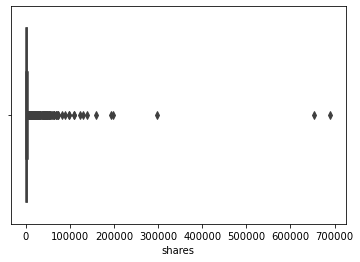

In [43]:
# plot "shares" column on distplot
sns.boxplot(x="shares", data = df3);

In [44]:
#define a function to remove outliers
def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    iqr = Q3 - Q1
    min_= Q1 - 1.5*iqr
    max_= Q3 + 1.5*iqr
    return data.loc[(data[col] > min_) & (data[col] < max_)]

In [45]:
df4 = remove_outliers(df3, "shares")

The below histogram indicates that most of the articles published at Mashable received approximately 800-1400 shares

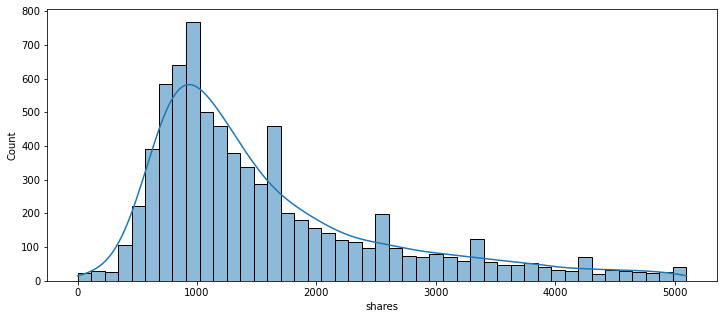

In [46]:
#plotting the distribution of "shares" again
fig, ax = plt.subplots(figsize = (12,5))
sns.histplot(x="shares", data=df4,kde=True); 

In [47]:
df4.shares.describe()

count    7573.000000
mean     1597.213522
std      1014.338680
min         1.000000
25%       884.000000
50%      1300.000000
75%      2000.000000
max      5100.000000
Name: shares, dtype: float64

Since the number of shares are widely spread from 1 to 5100, we decided to categorize the number of shares by creating a new column "popularity". In addition, we have not found any documents showing how to categorize "popularity" by "shares"; thus, we did the categorization by our intuition.

In [48]:
def pop_(x):
    if x < 5100*0.1: #shares less than the bottom 10%
        return "Very poor"
    elif x >= 5100*0.1 and x < 5100*0.25:
        return "Poor"
    elif x >= 5100*0.25 and x < 5100*0.60:
        return "Average"
    elif x >= 5100*0.6 and x < 5100*0.9:
        return "Good"
    else:
        return "Very Good"

In [49]:
#apply func pop_ to the series df3.shares
df4['Popularity'] = df4.shares.apply(pop_)

In [50]:
#checking top five rows of df4
df4.head()

,num_imgs,num_videos,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,channel,weekday,Popularity
0,3,0,0.490980,0.186609,0.400000,-0.200000,869,lifestyle,monday,Poor
1,7,0,0.428267,0.146465,1.000000,0.000000,923,lifestyle,monday,Poor
2,1,0,0.520380,0.040188,0.000000,0.000000,1900,lifestyle,monday,Average
3,1,2,0.641954,0.209512,1.000000,0.500000,1100,lifestyle,monday,Poor
4,1,0,0.415791,0.098707,0.377273,0.018182,944,lifestyle,monday,Poor


**Inspect "weekday" and "channel" column**

In [51]:
sns.set_theme(style="darkgrid")

In [52]:
a = df4.Popularity.unique().tolist()
b = df4.weekday.unique().tolist()
c = df4.channel.unique().tolist()

In [53]:
popularity_weekday_channel = [a] + [b] + [c]

From the following countplots, it clearly shows:
- Most of articles published on Mashable attained "poor" or "average" popularity
- Most of articles were published on weekdays (especially on Tue, Wed and Thu) and were about "World" and "Technology" topics

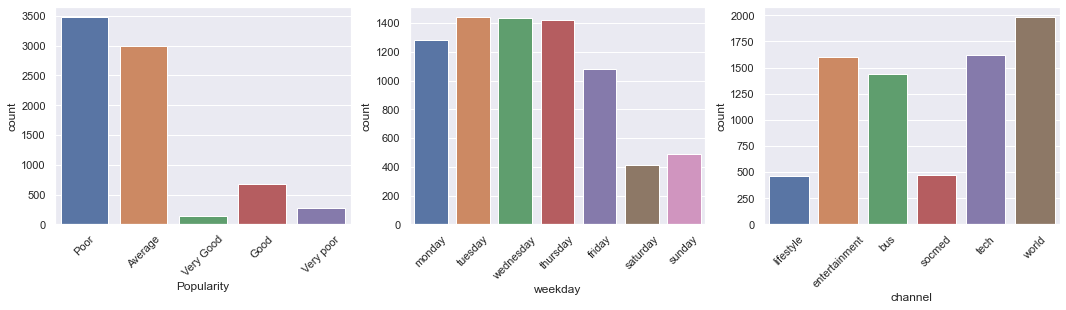

In [54]:
fig, ax = plt.subplots(1,3,figsize = (18,4))
sns.countplot(x = "Popularity", data = df4, ax = ax[0]);
sns.countplot(x = "weekday", data= df4, ax = ax[1]);
sns.countplot(x = "channel", data=df4, ax = ax[2]);
for i in range(3):
    ax[i].set_xticklabels(labels = popularity_weekday_channel[i], rotation = 45)
plt.show()

Though most of the news published on weekdays, those posted on Saturday and Sunday were more popular 

(the ratio of medium, excellent and high tended to be higher on weekend, compared to weekdays)

In [55]:
data = df4.pivot_table(index = ["Popularity","weekday","channel"], values = "shares", aggfunc = "count").reset_index()

In [56]:
fig1 = px.bar(data, x = "shares", y = "weekday", color = "Popularity", orientation = "h",
             labels = {
                 "shares": "Popularity (no. of articles)",
                 "weekday": "weekday"
             },
             title = "Popularity across weekdays", 
             color_discrete_sequence=px.colors.qualitative.Pastel,
             category_orders = {
                 "Popularity": ["Very poor", "Poor", "Average", "Good", "Very Good"],
                 "weekday": ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]}
             )

fig1.show()

In [57]:
fig2 = px.bar(data, x = "shares", y = "channel", color = "Popularity", orientation = "h",
             labels = {
                 "shares": "Popularity (no. of articles)",
                 "weekday": "Channel"
             },
             title = "Popularity across channels",
             color_discrete_sequence=px.colors.qualitative.Pastel,
             category_orders = {
                 "Popularity": ["Very poor", "Poor", "Average", "Good", "Very Good"]
             })

fig2.show()

- Though articles about "world" were posted mostly, they received less shares than "tech" or "socmed" articles.

**Inspect "Digital" category**

In [58]:
digital_cat = ["num_imgs", "num_videos"]

The below plots showed data is highly left concentrated with many outliers on the right tail. 

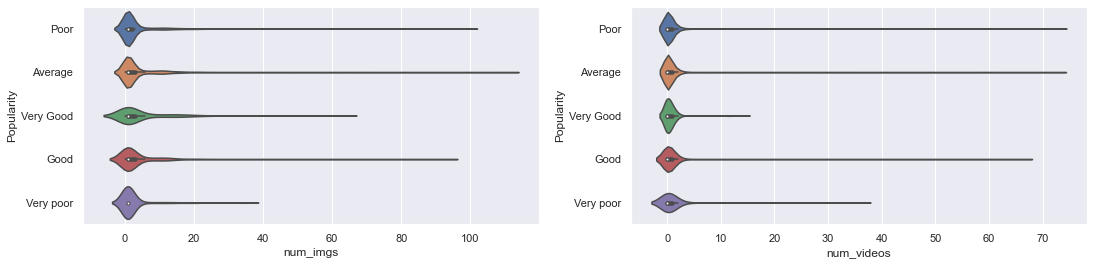

In [59]:
fig, ax = plt.subplots(1,2,figsize=(18,4))
for i in range(2):
    sns.violinplot(x = digital_cat[i] ,data = df4, y ="Popularity", ax = ax[i])     

In [60]:
#remove outliers from both num_imgs and num_videos
df_imgs = remove_outliers(df4, "num_imgs")
df_videos = remove_outliers(df4, "num_videos")

In [61]:
#inner merge df_imgs and df_videos
df_digital = df_imgs.merge(df_videos)

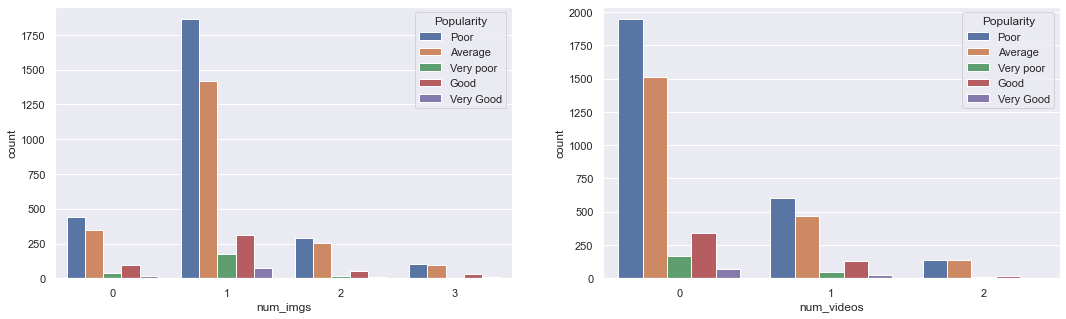

In [62]:
fig, ax = plt.subplots(1,2,figsize=(18,5))
sns.countplot(x = "num_imgs" , data = df_digital, hue ="Popularity", ax = ax[0]);
sns.countplot(x = "num_videos" ,data = df_digital, hue ="Popularity", ax = ax[1]);

The above figures showed that mostly news pusblished at Mashable contains 1 image and zero video.
To investigate further how many images and video per news will attract more shares, we use the below plots:

In [63]:
df_digital_plot = df_digital.pivot_table(index = ["Popularity","num_imgs", "num_videos"], 
                                 values = "shares", aggfunc = "count").reset_index()

The below plots confirmed that news at Mashable mostly containing 01 imgs and zero videos. 

However, this combination did not attract readers interest in sharing the news. Yet, when the news having 2 or 3 images (regardless of the number of videos from 0 to 2), the news has gotten better popularity

In [64]:
px.bar(df_digital_plot, y="shares", color="Popularity", barmode="group",
             x ="num_imgs", facet_col="num_videos",
             color_discrete_sequence = px.colors.qualitative.Pastel,
             height = 400, width = 1000,
             category_orders={"Popularity": ["Very poor", "Poor", "Average", "Good", "Very Good"],
                              })

**Inspecting Language Cat**

In [65]:
language_cat = ['global_subjectivity', 'global_sentiment_polarity', 'title_subjectivity', 'title_sentiment_polarity',"shares","Popularity"]

In [66]:
df_lan = df4[language_cat]

In [67]:
df_lan.head()

,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,Popularity
0,0.490980,0.186609,0.400000,-0.200000,869,Poor
1,0.428267,0.146465,1.000000,0.000000,923,Poor
2,0.520380,0.040188,0.000000,0.000000,1900,Average
3,0.641954,0.209512,1.000000,0.500000,1100,Poor
4,0.415791,0.098707,0.377273,0.018182,944,Poor


The pairplot belows indicated that the four variables in the language cat are normally indicated. The scatters shows almost no correlation between variables

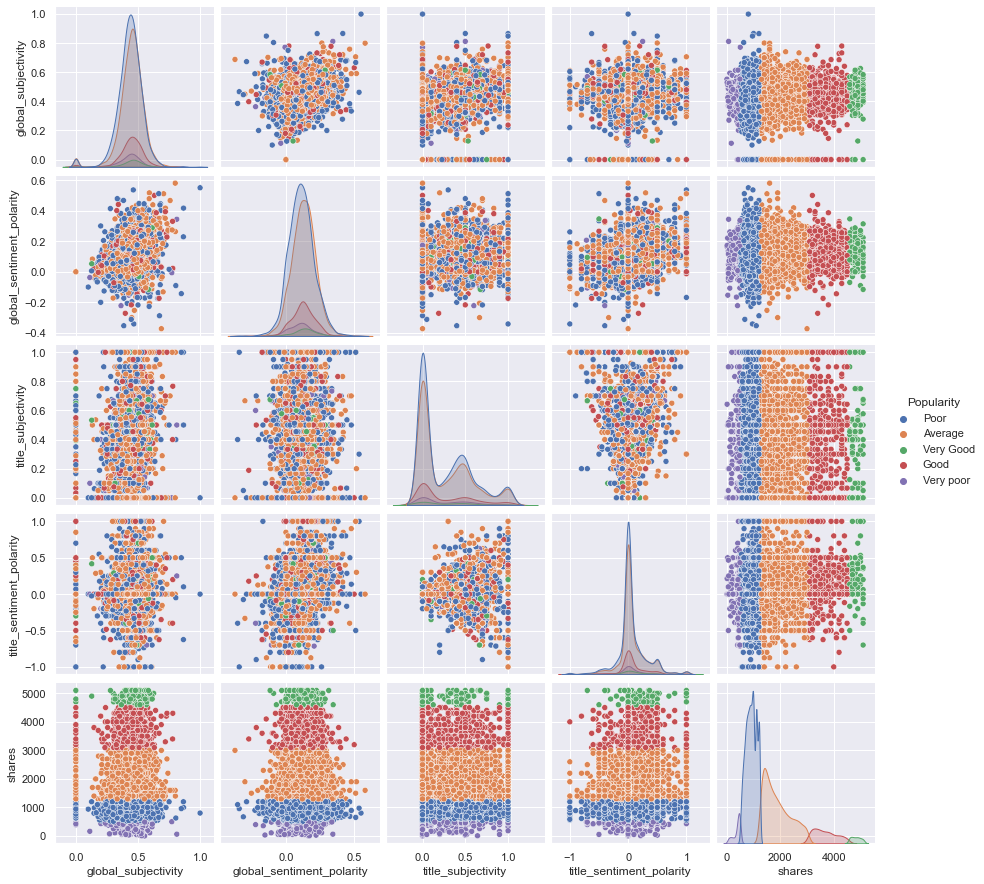

In [68]:
sns.pairplot(df_lan, hue = "Popularity")

In [69]:
df_lan['content_subjectivity'] = "_"
df_lan.loc[(df_lan.global_subjectivity <= 0.6), "content_subjectivity"] = "non_subjective"
df_lan.loc[(df_lan.global_subjectivity > 0.6), "content_subjectivity"] = "subjective"

df_lan['content_polarity'] = "_"
df_lan.loc[(df_lan.global_sentiment_polarity == 0), "content_polarity"] = "neutral"
df_lan.loc[(df_lan.global_sentiment_polarity > 0), "content_polarity"] = "positive"
df_lan.loc[(df_lan.global_sentiment_polarity < 0), "content_polarity"] = "negative"

df_lan['title_subjectivity_cat'] = "_"
df_lan.loc[(df_lan.title_subjectivity <= 0.6), "title_subjectivity_cat"] = "non_subjective"
df_lan.loc[(df_lan.title_subjectivity > 0.6), "title_subjectivity_cat"] = "subjective"

df_lan['title_polarity'] = "_"
df_lan.loc[(df_lan.title_sentiment_polarity == 0), "title_polarity"] = "neutral"
df_lan.loc[(df_lan.title_sentiment_polarity > 0), "title_polarity"] = "positive"
df_lan.loc[(df_lan.title_sentiment_polarity < 0), "title_polarity"] = "negative"

In [70]:
df_lan.head()

,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,Popularity,content_subjectivity,content_polarity,title_subjectivity_cat,title_polarity
0,0.490980,0.186609,0.400000,-0.200000,869,Poor,non_subjective,positive,non_subjective,negative
1,0.428267,0.146465,1.000000,0.000000,923,Poor,non_subjective,positive,subjective,neutral
2,0.520380,0.040188,0.000000,0.000000,1900,Average,non_subjective,positive,non_subjective,neutral
3,0.641954,0.209512,1.000000,0.500000,1100,Poor,subjective,positive,subjective,positive
4,0.415791,0.098707,0.377273,0.018182,944,Poor,non_subjective,positive,non_subjective,positive


By looking at the descriptive table, we can clearly see that Most articles at Mashable having the **non_subjective"** and **"positive"** content while the title sounds **normal** and **non_subjective** as well.

In [71]:
df_lan.select_dtypes(include ="object").describe()

,Popularity,content_subjectivity,content_polarity,title_subjectivity_cat,title_polarity
count,7573,7573,7573,7573,7573
unique,5,2,3,2,3
top,Poor,non_subjective,positive,non_subjective,neutral
freq,3478,7340,6872,6464,3931


In [72]:
df_lan_plot = df_lan.pivot_table(index = ["Popularity","content_subjectivity","content_polarity",
                                         "title_subjectivity_cat", "title_polarity"], 
                                 values = "shares", aggfunc = "count").reset_index()

**Inspecting title languague**

In [73]:
px.bar(df_lan_plot, y="shares", color="Popularity", barmode="group",
             x ="title_polarity", facet_col="title_subjectivity_cat",
             color_discrete_sequence = px.colors.qualitative.Pastel,
             height = 400, width = 1000,
             category_orders={"Popularity": ["Very poor", "Poor", "Average", "Good", "Very Good"],
                              })

Most of the titles of articles published at Mashable are **non_subjective** and either they are neutral or positive. 
However, the non_subjective titled news did not attract shares as the subjective one. Readers perfered to share news with subjective but positive and neutral polarity.

**Inspecting the content language**

In [74]:
fig = px.bar(df_lan_plot, y="shares", color="Popularity", barmode="group",
             x ="content_polarity", facet_col="content_subjectivity",
             color_discrete_sequence = px.colors.qualitative.Pastel,
             height = 350, width = 1000,
             category_orders={"Popularity": ["Very poor", "Poor", "Average", "Good", "Very Good"],
                              })

fig.show()

The number of articles having non_subjective content highly outnumbered the ones whose content is subjective.
If the content is subjective, it is completely positive. Readers also were in flavor of positive content regardless it is subjective ore not


## <font color='DARK'>DATA ANALYSIS WITHOUT TIDYING</font>

In [75]:
#retrieving data with basis cleaning before tyding(e.g columns, missing values)
df.head()

,lifestyle,entertainment,bus,socmed,tech,world,num_imgs,num_videos,monday,tuesday,wednesday,thursday,friday,saturday,sunday,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares
35666,0,1,0,0,0,0,7,0,0,0,1,0,0,0,0,0.479183,-0.013323,1.000000,0.000000,2100
27091,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0.486458,-0.018750,0.000000,0.000000,9400
18069,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.529167,-0.072222,0.666667,-0.700000,1200
5317,0,0,0,0,1,0,23,0,0,0,0,0,0,1,0,0.521715,0.179113,0.000000,0.000000,5600
5073,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0.391667,0.067949,0.454545,0.136364,5800


In [76]:
#reset_index and drop the old_index
df_a = df.reset_index(drop=True)
df_a.head()

,lifestyle,entertainment,bus,socmed,tech,world,num_imgs,num_videos,monday,tuesday,wednesday,thursday,friday,saturday,sunday,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares
0,0,1,0,0,0,0,7,0,0,0,1,0,0,0,0,0.479183,-0.013323,1.000000,0.000000,2100
1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0.486458,-0.018750,0.000000,0.000000,9400
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.529167,-0.072222,0.666667,-0.700000,1200
3,0,0,0,0,1,0,23,0,0,0,0,0,0,1,0,0.521715,0.179113,0.000000,0.000000,5600
4,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0.391667,0.067949,0.454545,0.136364,5800


**Create a "Popularity" Column**
It is similar as do with "tidy" one.

In [77]:
#define a function to 
def pop_(x):
    if x < 5100*0.1: #shares less than the bottom 10%
        return "Very poor"
    elif x >= 5100*0.1 and x < 5100*0.25:
        return "Poor"
    elif x >= 5100*0.25 and x < 5100*0.60:
        return "Average"
    elif x >= 5100*0.6 and x < 5100*0.9:
        return "Good"
    else:
        return "Very Good"

In [78]:
df_a['Popularity'] = df_a.shares.apply(pop_)

In [79]:
df_a.head(3)

,lifestyle,entertainment,bus,socmed,tech,world,num_imgs,num_videos,monday,tuesday,wednesday,thursday,friday,saturday,sunday,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,Popularity
0,0,1,0,0,0,0,7,0,0,0,1,0,0,0,0,0.479183,-0.013323,1.000000,0.0,2100,Average
1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0.486458,-0.018750,0.000000,0.0,9400,Very Good
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.529167,-0.072222,0.666667,-0.7,1200,Poor


In [80]:
df_a.columns

Index(['lifestyle', 'entertainment', 'bus', 'socmed', 'tech', 'world',
       'num_imgs', 'num_videos', 'monday', 'tuesday', 'wednesday', 'thursday',
       'friday', 'saturday', 'sunday', 'global_subjectivity',
       'global_sentiment_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'shares', 'Popularity'],
      dtype='object')

Because the "tidy" and "untidy" data mostly different in terms of unpivotting columns belonging to "weekday" and "channel" data, 
in this analysis, we will just focus on three most different points about:
- Removing observations without "weekday" or "channel" specified
- Counting the number of articles posted on each weekday and on different channel
- Plotting the number of articles by their popularity and by channel as well as weekday


## <font color='Blue'>1. Data Cleaning</font>

**Remove observation with no "weekday" and "channel" specified**

Removing observations requires writing many conditions without tidying it first

In [81]:
#observations removed were the ones that dont have either "channel" or "weekday" specified; 
# thus, keep only observations with at least one column belong to channel specified AND one column of weekday specified
df_b = df_a.loc[(df_a.lifestyle == 1) | (df_a.entertainment == 1)  | (df_a.bus == 1)  | (df_a.socmed == 1)  |
         (df_a.tech == 1) | (df_a.world == 1)  & ((df_a.monday == 1)  | (df_a.tuesday == 1)  | (df_a.wednesday == 1)  |
         (df_a.thursday == 1)  | (df_a.friday == 1)  |(df_a.saturday == 1)  | (df_a.sunday == 1)),:]

In [82]:
#compare shape of df_b and df3: the dataframe after removing observations with no weekday and channel
df_b.shape[0] == df3.shape[0]

True

In [83]:
#create a list for later analysis
weekday_list = ['monday', "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]
channel_list = ['lifestyle', "entertainment", "bus", "socmed", "tech", "world"]

## <font color='Blue'>2. Further Analysis </font>

**Checking descriptive statistics of columns in weekday_list and channel_list**

*There are almost no valuable information from .describe() method using messy data since pd counts both zero and non-zero values*

In [84]:
#checking descriptive statistic for weekday and channel columns
df_b[weekday_list + channel_list].describe()

,monday,tuesday,wednesday,thursday,friday,saturday,sunday,lifestyle,entertainment,bus,socmed,tech,world
count,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000
mean,0.168539,0.191484,0.189592,0.186635,0.139917,0.057363,0.066470,0.064104,0.210526,0.189355,0.065405,0.218924,0.251685
std,0.374367,0.393493,0.392001,0.389641,0.346922,0.232548,0.249116,0.244953,0.407707,0.391814,0.247254,0.413541,0.434007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Count the number of news per channel and per weekday**

We dedided to use a function to count articles 
(using loc to get everyrow with value equal to 1 is also another way)

In [85]:
from collections import defaultdict
def counting(col_list):
    dict_ = defaultdict(int)
    for i in col_list:
        #if an observation has 'channel' or 'weekday' column have a value equal to 1, it will be added 01 to the value of dict
        dict_[i] = df_b.loc[df_a[i] == 1][i].sum()        
    return dict_

In [86]:
#count the number of articles per channel
per_channel = counting(channel_list)
per_channel

defaultdict(int,
            {'lifestyle': 542,
             'entertainment': 1780,
             'bus': 1601,
             'socmed': 553,
             'tech': 1851,
             'world': 2128})

In [87]:
#count the number of articles per weekday
per_weekday = counting(weekday_list)
per_weekday

defaultdict(int,
            {'monday': 1425,
             'tuesday': 1619,
             'wednesday': 1603,
             'thursday': 1578,
             'friday': 1183,
             'saturday': 485,
             'sunday': 562})

**Inspecting the popularity by weekday**

In [88]:
#create 07 dataframes. Each groupby.shares.count(0) return a series with two index(0,1), 
# 0 means it not the specided weekday and 1 means "Yes". Thus, we only selected index 1 
df_m = pd.DataFrame(df_b.groupby(['monday','Popularity']).shares.count().xs(1))
df_tu = pd.DataFrame(df_b.groupby(['tuesday','Popularity']).shares.count().xs(1))
df_w = pd.DataFrame(df_b.groupby(['wednesday','Popularity']).shares.count().xs(1))
df_th = pd.DataFrame(df_b.groupby(['thursday','Popularity']).shares.count().xs(1))
df_f = pd.DataFrame(df_b.groupby(['friday','Popularity']).shares.count().xs(1))
df_sa = pd.DataFrame(df_b.groupby(['saturday','Popularity']).shares.count().xs(1))
df_su = pd.DataFrame(df_b.groupby(['sunday','Popularity']).shares.count().xs(1))

In [89]:
#concat the 07 dataframe by columns, and change the column name
by_pop_weekday = pd.concat([df_m, df_tu, df_w, df_th, df_f, df_sa, df_su], axis=1)
by_pop_weekday.columns = weekday_list

In [90]:
#this dataframe can be used for barplot. However, we want to look at the barplot categorized first by "weekday", and then by "popularity"
by_weekday_pop = by_pop_weekday.T

In [91]:
by_weekday_pop.iplot(kind ="bar")

In [92]:
#create the 6 dataframe for "channel"
df_lifestyle = pd.DataFrame(df_b.groupby(['lifestyle','Popularity']).shares.count().xs(1))
df_entertainment = pd.DataFrame(df_b.groupby(["entertainment",'Popularity']).shares.count().xs(1))
df_bus = pd.DataFrame(df_b.groupby(['bus','Popularity']).shares.count().xs(1))
df_socmed = pd.DataFrame(df_b.groupby(['socmed','Popularity']).shares.count().xs(1))
df_tech = pd.DataFrame(df_b.groupby(['tech','Popularity']).shares.count().xs(1))
df_world = pd.DataFrame(df_b.groupby(['world','Popularity']).shares.count().xs(1))

In [93]:
#concat the 7 dataframe
by_pop_channel = pd.concat([df_lifestyle, df_entertainment, df_bus, df_socmed, df_tech, df_world], axis=1)
by_pop_channel.columns = channel_list

In [94]:
#plot the dataframe
by_pop_channel.T.iplot(kind="bar")